<a href="https://colab.research.google.com/github/PabloCGarcia/deepLearning/blob/main/Clase04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
device_name = tf.test.gpu_device_name()
print("tarjeta grafica:", device_name)

tarjeta grafica: /device:GPU:0


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[:5]

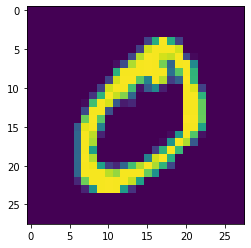

In [6]:
import matplotlib.pyplot as plt
image=x_train[1]
plt.imshow(image)
plt.show()

In [7]:
batch_size = 128 
num_classes = 10 
epochs = 20
img_rows, img_cols = 28, 28

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_test[:5]

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_test[:5]

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adadelta",
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])